In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
import os
path = os.getcwd()
df = pd.read_csv('./US/nmurx_us_19Q1.csv')
df = df.select_dtypes(exclude=["object"])
df= df.fillna(0)

In [3]:
forest = ExtraTreesClassifier(n_estimators=250)

In [4]:
Y = df['ILLXCAN_WK'].values
X = df.drop(['ILLXCAN_WK'], axis=1).values
print(Y)
print(X)


[0 0 0 ... 0 0 0]
[[3.00000000e+00 1.00000000e+00 2.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 7.07413613e+03]
 [3.00000000e+00 1.00000000e+00 2.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 4.06946079e+03]
 [3.00000000e+00 1.00000000e+00 2.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 7.55461812e+03]
 ...
 [3.00000000e+00 1.00000000e+00 2.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 2.58199037e+04]
 [3.00000000e+00 1.00000000e+00 2.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.15223774e+04]
 [3.00000000e+00 1.00000000e+00 2.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.18240887e+04]]


In [5]:
forest.fit(X,Y)
importances = forest.feature_importances_

In [6]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

Feature ranking:
1 feature 511 (0.1488335991111757) ILLXCAN_MNTH
2 feature 510 (0.08011281133776597) ILLXCAN_NTY
3 feature 516 (0.06476525669255875) ILL_MNTH
4 feature 509 (0.05489345018642284) ILLXCAN_YR
5 feature 515 (0.018210220080067983) ILL_NTY
6 feature 237 (0.010980342763513782) KRAT_USE
7 feature 514 (0.00885681834898746) ILL_YR
8 feature 213 (0.008675691586373666) CAN_REC
9 feature 290 (0.007895743996146348) DAST_2
10 feature 508 (0.007883060163963276) ILLXCAN_USE


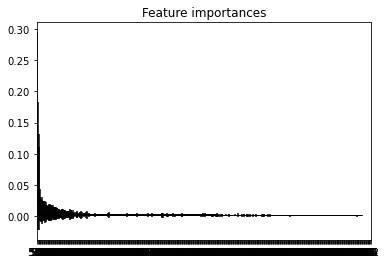

In [7]:
# Print the feature ranking
print("Feature ranking:")

for f in range(10):
    print(f"{f+1} feature {indices[f]} ({importances[indices[f]]}) {df.columns[indices[f]]}")

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [8]:
#log = LogisticRegression(max_iter = 50000)
#log.fit(X,Y)

In [9]:
#importance = model_coef_[0]
# summarize feature importance
#for i,v in enumerate(importance):
#	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.show()

In [10]:
decision = DecisionTreeClassifier()
decision.fit(X,Y)
feat_importance = decision.tree_.compute_feature_importances(normalize=False)
for i in range(X.shape[1]):
    if feat_importance[i] != 0:
        print(f"Feature {i} {feat_importance[i]} {df.columns[i]}")

Feature 3 9.772007897405408e-05 DEM_AGE
Feature 11 0.00013668976444727125 ORDER_PAINREL
Feature 19 6.485789843671542e-05 ORDER_PAINREL_API_ELU
Feature 31 0.00015050066724964147 ORDER_PAINREL_API_TAP
Feature 39 5.021256653165065e-05 GAB_USE
Feature 43 0.0002416456061114693 METH_USE
Feature 55 3.347504435443377e-05 ORDER_SED_API_CLON
Feature 58 0.00023969238370811127 ORDER_SED_API_EST
Feature 60 0.0001104676463696314 ORDER_SED_API_FLUR
Feature 82 0.00011167844584628116 QUA_USE
Feature 139 9.663333742132301e-05 MPHEN_USEYR
Feature 208 0.00010712014193418804 IBU_NMUYR
Feature 216 0.0007481170692785572 CAN_FREQ_WK
Feature 224 1.64550323514413e-05 CAN_RSNYR_OTH
Feature 231 5.951118996343781e-05 ALC_USE
Feature 253 0.00011351631543778299 MDMA_REC
Feature 255 0.00018959695334362265 ALKY_REC
Feature 256 6.344737416802141e-05 KRAT_REC
Feature 258 0.0005361229813684599 METHAM_REC
Feature 282 4.463339247257836e-05 LSD_FIRST
Feature 304 5.7385790321886474e-05 TRT_DEPYR_METH
Feature 334 6.5356038977

In [11]:
DAST = 

SyntaxError: invalid syntax (<ipython-input-11-1c0907735fbc>, line 1)

In [18]:
def find_features(target_feature, df):
    df_func = df
    Y = df_func[target_feature].values
    del df_func[target_feature]
    X = df_func.values
    forest = ExtraTreesClassifier(n_estimators=250)
    forest.fit(X,Y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
    indices = np.argsort(importances)[::-1]
    # Print the feature ranking
    print("Feature ranking:")

    for f in range(10):
        print(f"{f+1} feature {indices[f]} ({importances[indices[f]]}) {df.columns[indices[f]]}")

    

In [31]:
df2 = df[df.columns.difference(['DAST_1','DAST_SUM'])]

In [33]:
df3 = df[['DAST_1','DAST_2','DAST_3','DAST_4','DAST_5','DAST_6','DAST_7','DAST_8','DAST_9','DAST_10','DAST_CAT']]

In [93]:
def categorize_dast(val):
    if val > 4:
        return 1
    else:
        return 0

In [53]:
prescription_drugs_nmu = [col for col in df.columns if "NMUYR" in col]

In [54]:
illicit_drugs_use = ['COKE_USE','CRACK_USE','MDMA_USE','GHB_USE','ALKY_USE','KRAT_USE','SPEED_USE','METHAM_USE','NPFENT_USE','HEROIN_USE','KET_USE','MEPH_USE','LSD_USE','MUSH_USE','PCP_USE','MESC_USE','SPICE_USE','SAL_USE','COKE_USE']

In [95]:
total_drug_use = prescription_drugs_nmu + illicit_drugs_use
total_drug_use.append("DAST_CAT")

In [88]:
df['COKE_USE'].value_counts(normalize=True)[1]

0.10109463395038998

In [89]:
for drug in illicit_drugs_use:
    print(f"{drug}: {round(df[drug].value_counts(normalize=True)[1]*100,2)} %")

COKE_USE: 10.11 %
CRACK_USE: 3.44 %
MDMA_USE: 4.31 %
GHB_USE: 1.11 %
ALKY_USE: 3.4 %
KRAT_USE: 1.4 %
SPEED_USE: 4.69 %
METHAM_USE: 4.92 %
NPFENT_USE: 0.78 %
HEROIN_USE: 2.09 %
KET_USE: 1.62 %
MEPH_USE: 0.41 %
LSD_USE: 8.14 %
MUSH_USE: 7.6 %
PCP_USE: 1.94 %
MESC_USE: 3.39 %
SPICE_USE: 1.86 %
SAL_USE: 1.92 %
COKE_USE: 10.11 %


In [80]:
for drug in prescription_drugs_nmu:
    print(f"{drug}: {round(df[drug].value_counts(normalize=True)[1]*100,2)} %")

BHYD_NMUYR: 0.21 %
BUP_NMUYR: 0.37 %
COD_NMUYR: 2.06 %
DIHY_NMUYR: 0.19 %
ELU_NMUYR: 0.14 %
FENT_NMUYR: 0.44 %
GAB_NMUYR: 0.87 %
HYD_NMUYR: 2.27 %
HYDM_NMUYR: 0.28 %
KTM_NMUYR: 0.34 %
METH_NMUYR: 0.39 %
MORPH_NMUYR: 0.86 %
OXY_NMUYR: 1.91 %
OXYM_NMUYR: 0.27 %
PREG_NMUYR: 0.21 %
SUF_NMUYR: 0.17 %
TAP_NMUYR: 0.16 %
TRAM_NMUYR: 1.29 %
ALP_NMUYR: 1.36 %
BAC_NMUYR: 0.32 %
CHL_NMUYR: 0.1 %
CLOB_NMUYR: 0.13 %
CLON_NMUYR: 0.84 %
CLOR_NMUYR: 0.16 %
DIA_NMUYR: 0.74 %
EST_NMUYR: 0.1 %
ESZ_NMUYR: 0.15 %
FLUR_NMUYR: 0.14 %
LORA_NMUYR: 0.85 %
MID_NMUYR: 0.17 %
OXA_NMUYR: 0.13 %
QUA_NMUYR: 0.11 %
TEM_NMUYR: 0.21 %
TRI_NMUYR: 0.12 %
ZAL_NMUYR: 0.12 %
ZOL_NMUYR: 0.48 %
AMPH_NMUYR: 1.47 %
ATOM_NMUYR: 0.26 %
MPHEN_NMUYR: 0.37 %
MOD_NMUYR: 0.25 %
CANN_NMUYR: 0.75 %
DRON_NMUYR: 0.28 %
NAB_NMUYR: 0.26 %
ACE_NMUYR: 6.64 %
ASP_NMUYR: 6.39 %
DEX_NMUYR: 2.02 %
DIPH_NMUYR: 3.39 %
IBU_NMUYR: 9.57 %
LOP_NMUYR: 1.01 %
NAP_NMUYR: 3.42 %
OTCOTH_NMUYR: 1.36 %
PAINREL_NMUYR: 6.66 %
SED_NMUYR: 3.68 %
STIM_NMUYR: 2.0 %
T

In [106]:
drug_list = df[total_drug_use]
drug_list['DAST_ADD']=drug_list['DAST_CAT'].apply(categorize_dast)
del drug_list['DAST_CAT']

<ipython-input-106-b78891166d90>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_list['DAST_ADD']=drug_list['DAST_CAT'].apply(categorize_dast)


In [110]:
illicit_drugs_use.append("DAST_CAT")
illicit_drugs_use
illicit_drug_list = df[illicit_drugs_use]
#illicit_drug_list['DAST_ADD']=illicit_drug_list['DAST_CAT'].apply(categorize_dast)
#del illicit_drug_list['DAST_CAT']

In [127]:
drug_cat = ['PAINREL_NMU','SED_NMU','STIM_NMU','THC_NMU','OP_NMU','GABA_NMU','DAST_CAT']
drugs = df[drug_cat]
drugs['DAST_ADD'] = drugs['DAST_CAT'].apply(categorize_dast)
del drugs['DAST_CAT']

<ipython-input-127-db2b161c8077>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugs['DAST_ADD'] = drugs['DAST_CAT'].apply(categorize_dast)


In [128]:
drug_cat_wk = ['PAINREL_NMUWK','SED_NMUWK','STIM_NMUWK','THC_NMUWK','OP_NMUWK','GABA_NMUWK','DAST_CAT']
drugswk = df[drug_cat]
drugswk['DAST_ADD'] = drugswk['DAST_CAT'].apply(categorize_dast)
del drugswk['DAST_CAT']

<ipython-input-128-4ac8675464f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugswk['DAST_ADD'] = drugswk['DAST_CAT'].apply(categorize_dast)


In [129]:
find_features('DAST_ADD',drugs)


Feature ranking:
1 feature 1 (0.28147765247664236) SED_NMU
2 feature 2 (0.208144158584192) STIM_NMU
3 feature 5 (0.19910719434397894) GABA_NMU
4 feature 4 (0.17074757096092458) OP_NMU
5 feature 0 (0.10702647142884328) PAINREL_NMU
6 feature 3 (0.033496952205418706) THC_NMU


IndexError: index 6 is out of bounds for axis 0 with size 6

In [37]:
train, test = train_test_split(df3, test_size=0.2)
train['DAST_ADD'] = train['DAST_CAT'].apply(categorize_dast)
del train['DAST_CAT']
Y = train['DAST_ADD'].values
del train['DAST_ADD']
X = train.values


log = LogisticRegression(solver='liblinear',C=10.0, random_state=0)
log.fit(X,Y)
log.score(X,Y)

<ipython-input-37-2d368a1e0f78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['DAST_ADD'] = train['DAST_CAT'].apply(categorize_dast)


0.9999581554941837

In [38]:
test['DAST_ADD'] = test['DAST_CAT'].apply(categorize_dast)
del test['DAST_CAT']
Ytest = test['DAST_ADD'].values
del test['DAST_ADD']
Xtest = test.values

<ipython-input-38-60cbcf4a91a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['DAST_ADD'] = test['DAST_CAT'].apply(categorize_dast)


In [39]:
log.score(Xtest,Ytest)

1.0

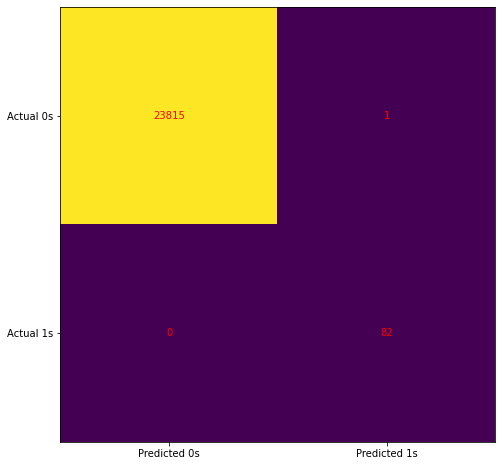

In [44]:
cm = confusion_matrix(Y, log.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()